In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
from sklearn import tree

In [5]:
clf = tree.DecisionTreeClassifier()

In [6]:
x = df.iloc[:,:-1]
y = df["Outcome"]

In [7]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

In [8]:
scores = cross_val_score(clf, x, y, cv=10)

In [9]:
print(scores)

[0.68831169 0.72727273 0.71428571 0.58441558 0.68831169 0.71428571
 0.80519481 0.76623377 0.64473684 0.72368421]


In [10]:
scores = cross_validate(clf, x, y,scoring='precision_macro', cv=10,return_estimator=True)

In [11]:
scores

{'fit_time': array([0.00699902, 0.00600004, 0.0079987 , 0.00700164, 0.00550652,
        0.00599813, 0.00600028, 0.00499892, 0.0059979 , 0.00599933]),
 'score_time': array([0.00600004, 0.0030005 , 0.00399899, 0.00399995, 0.00700283,
        0.00300169, 0.00300217, 0.00400233, 0.00300145, 0.00400186]),
 'estimator': [DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier()],
 'test_score': array([0.62925926, 0.7       , 0.67346939, 0.55467572, 0.63636364,
        0.67346939, 0.80307692, 0.74384615, 0.55974026, 0.69215686])}

In [12]:
xyz = scores["estimator"][np.argmax(scores["test_score"])]
y_pred = xyz.predict(x)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [14]:
print(confusion_matrix(y,y_pred))

[[494   6]
 [  8 260]]


In [15]:
print(accuracy_score(y,y_pred))

0.9817708333333334


[Text(563.0337918660288, 875.8, 'X[1] <= 154.5\ngini = 0.454\nsamples = 691\nvalue = [450, 241]'),
 Text(297.2996411483254, 815.4, 'X[7] <= 30.5\ngini = 0.386\nsamples = 581\nvalue = [429, 152]'),
 Text(174.9312200956938, 755.0, 'X[1] <= 117.5\ngini = 0.258\nsamples = 342\nvalue = [290, 52]'),
 Text(122.36842105263159, 694.6, 'X[5] <= 45.35\ngini = 0.145\nsamples = 229\nvalue = [211, 18]'),
 Text(113.46889952153111, 634.2, 'X[0] <= 6.5\ngini = 0.124\nsamples = 226\nvalue = [211, 15]'),
 Text(80.09569377990431, 573.8, 'X[6] <= 0.67\ngini = 0.11\nsamples = 222\nvalue = [209, 13]'),
 Text(48.94736842105264, 513.4000000000001, 'X[5] <= 30.95\ngini = 0.069\nsamples = 195\nvalue = [188, 7]'),
 Text(40.047846889952154, 453.0, 'gini = 0.0\nsamples = 116\nvalue = [116, 0]'),
 Text(57.84688995215311, 453.0, 'X[5] <= 31.1\ngini = 0.162\nsamples = 79\nvalue = [72, 7]'),
 Text(48.94736842105264, 392.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(66.7464114832536, 392.6, 'X[4] <= 36.5\ngini = 

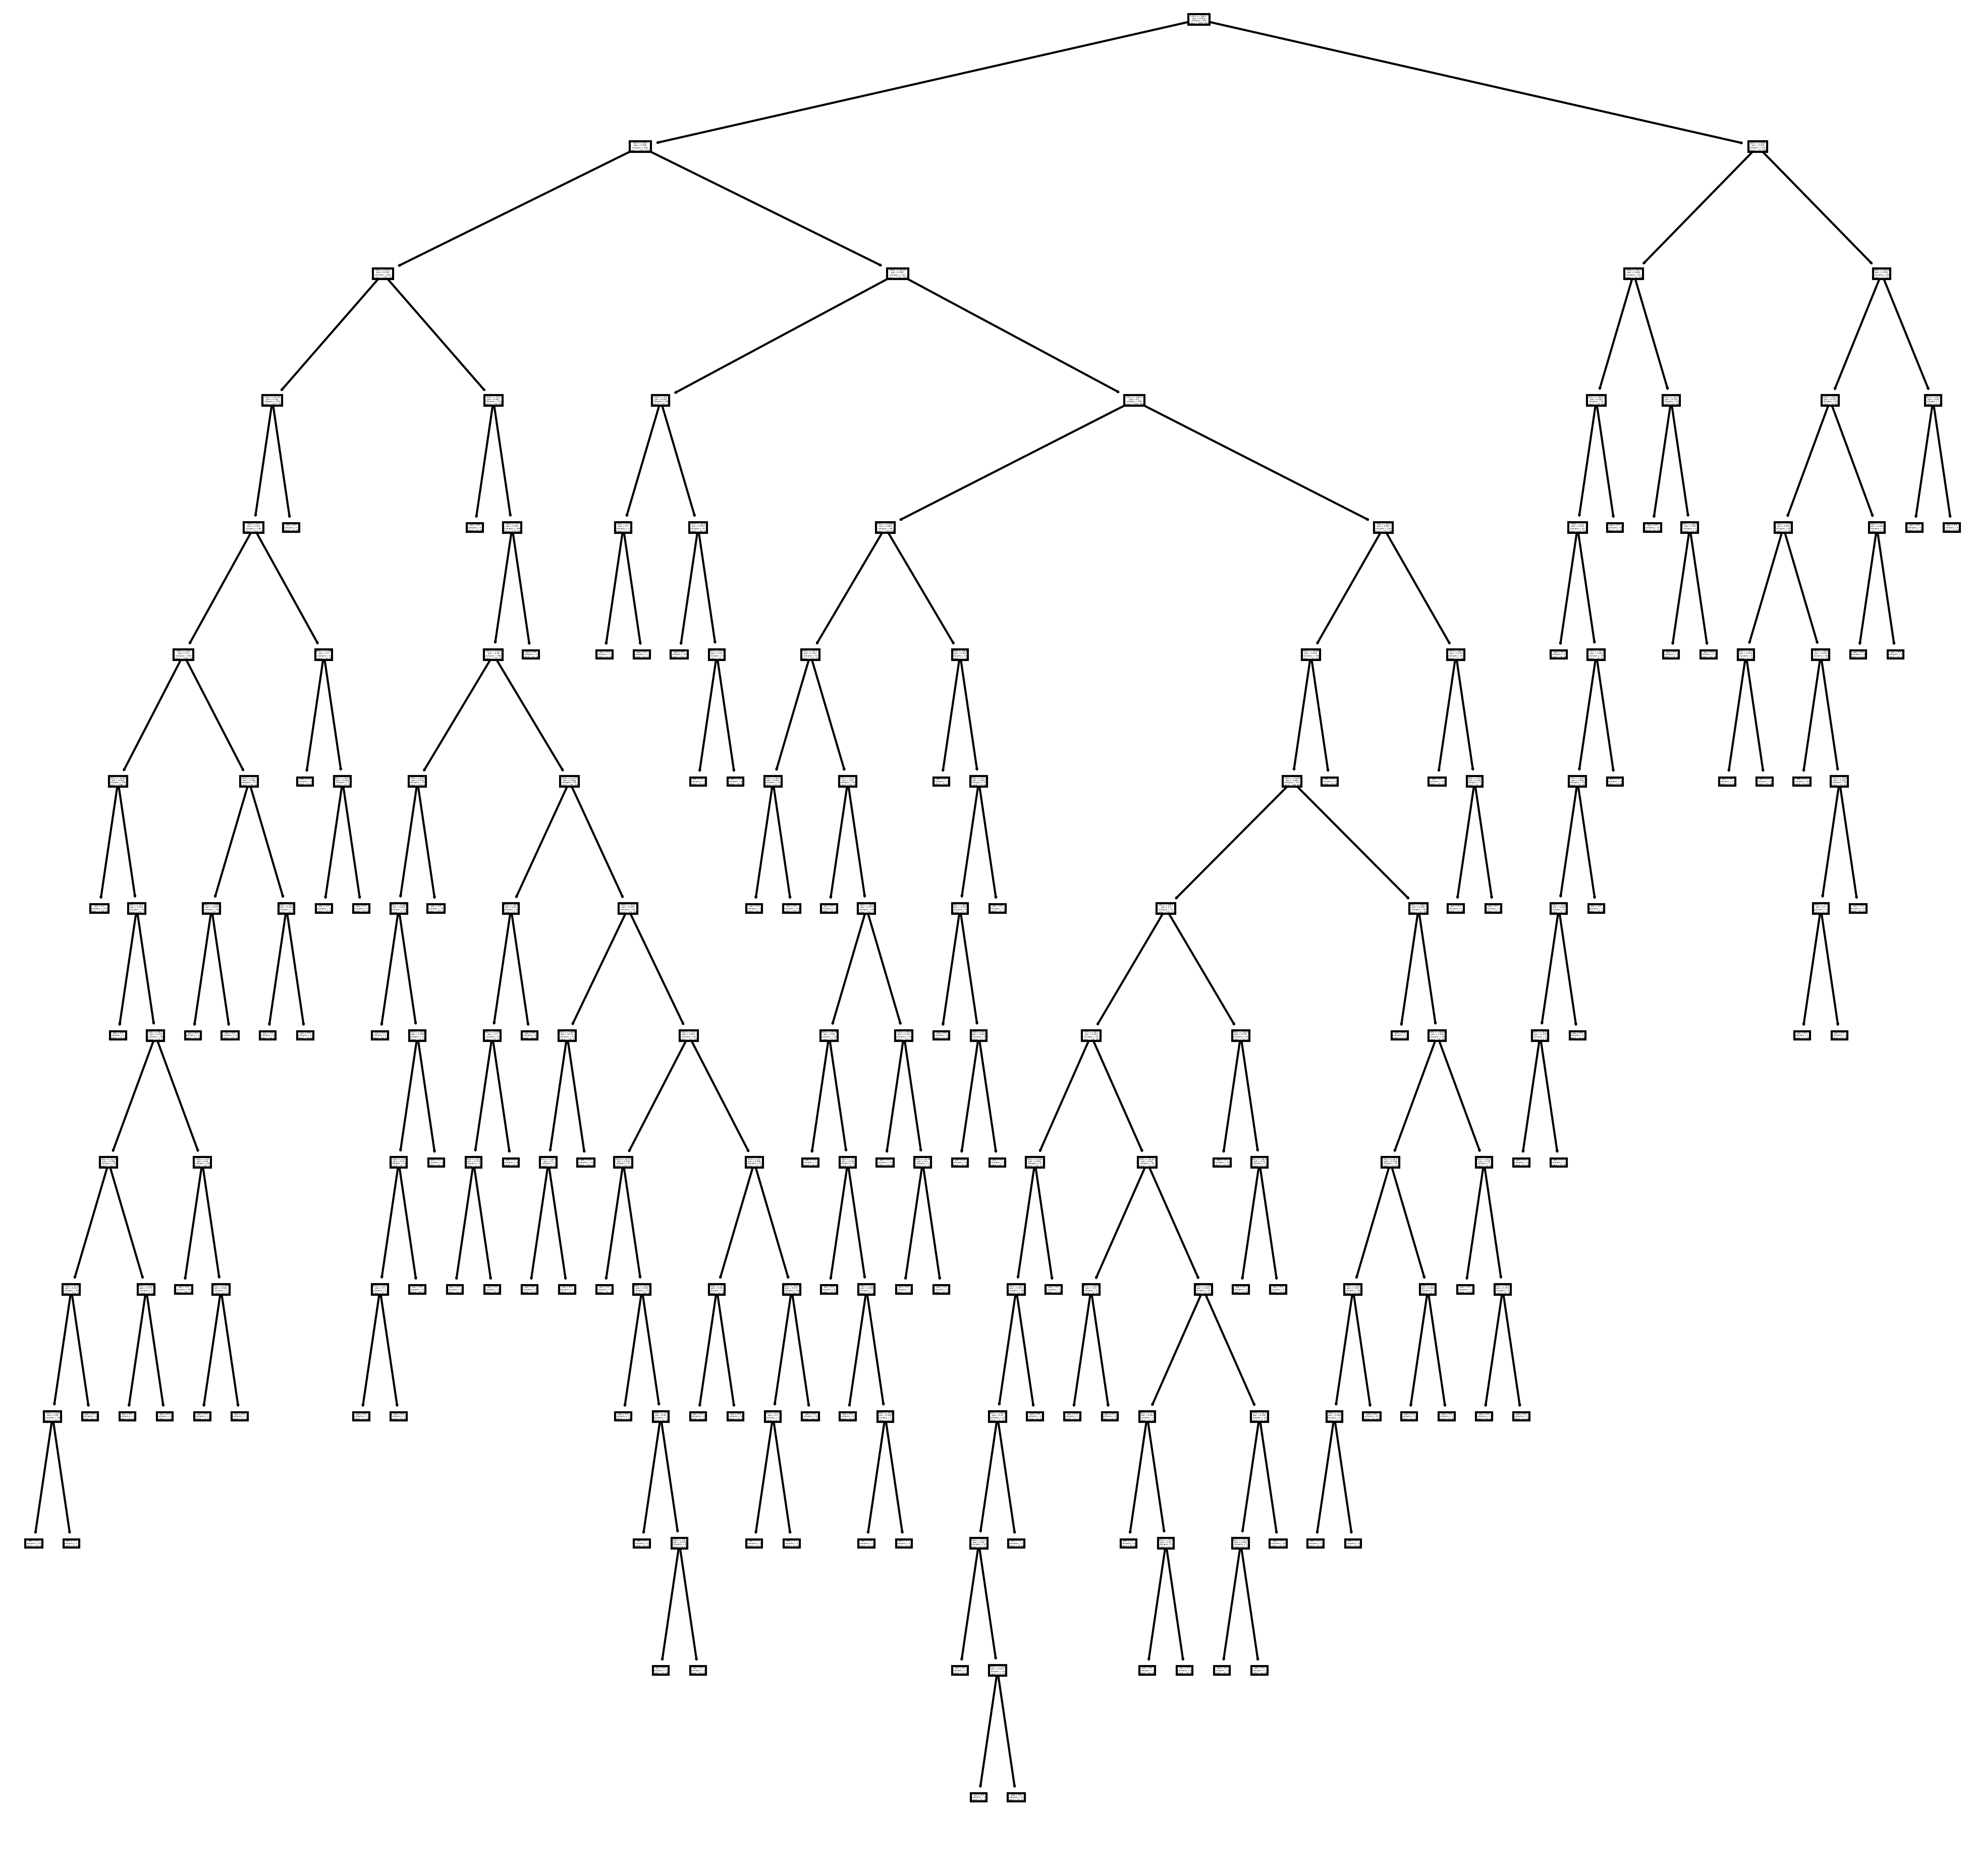

In [16]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(xyz)
# fig.savefig('images/decisionTree.png')

In [17]:
import scipy.stats as st

In [18]:
st.t.interval(alpha=0.95, df=len(scores["test_score"])-1,
              loc=np.mean(scores["test_score"]),
              scale=st.sem(scores["test_score"]))

(0.6118599835891542, 0.7213515338072373)

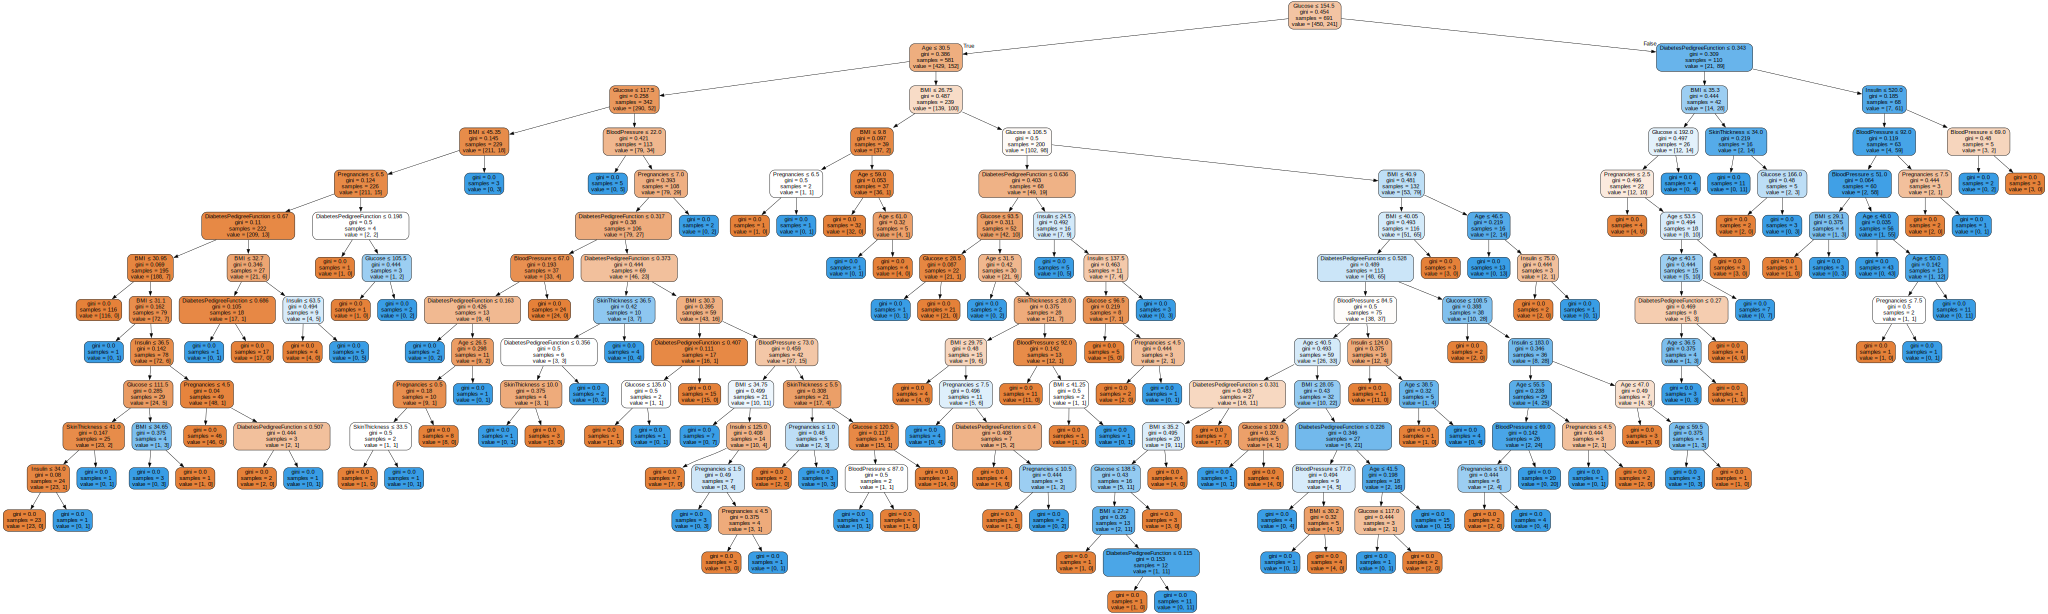

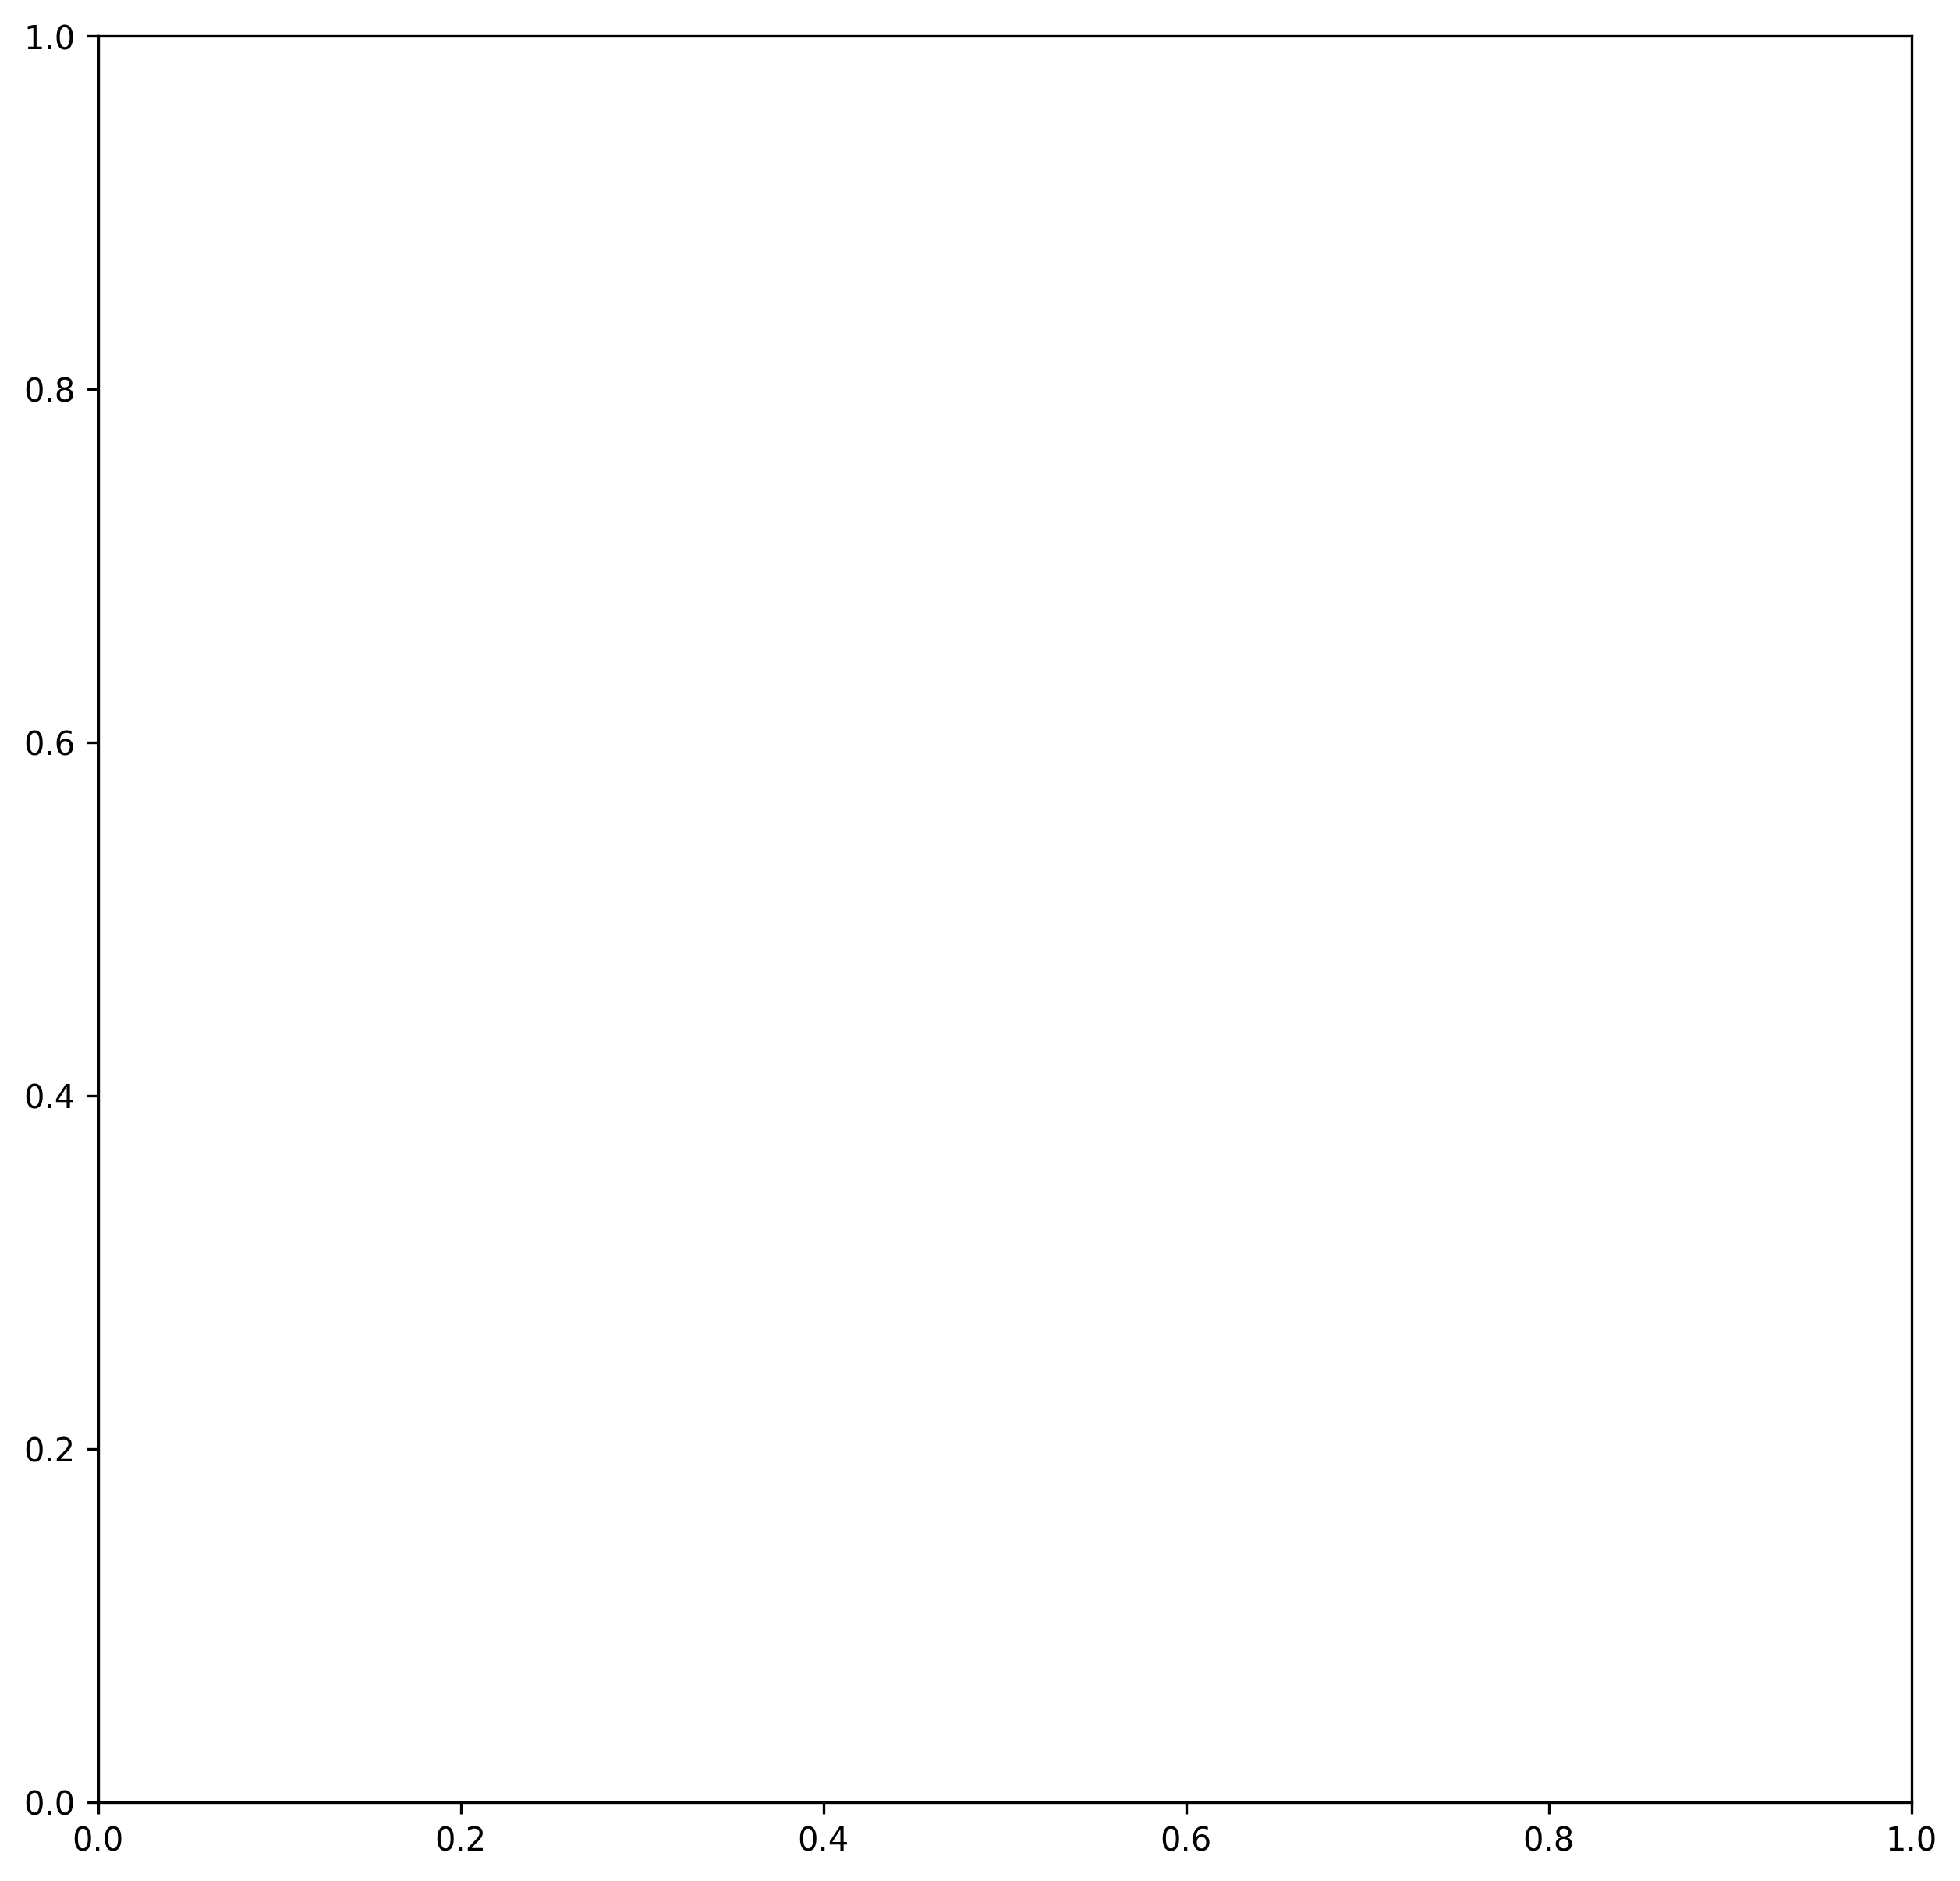

In [20]:
import graphviz
dot_data = tree.export_graphviz(xyz, 
                  feature_names=df.columns[:-1],  
#                   class_names=df["Outcome"].unique(),  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
graph

In [21]:
fig.savefig('images/tree1.png')